In [268]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [269]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [270]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [271]:
# Combine the data into a single dataset
all_data=pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

In [272]:
# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [273]:
# Checking the number of mice.
mice_data = all_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [274]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=all_data[all_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_id=duplicate_mice["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [275]:
#Get all the data for the duplicate mouse ID. 
all_mouse_dupe=all_data.loc[all_data["Mouse ID"]==duplicate_id[0]]
all_mouse_dupe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [276]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_all_data=all_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [277]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice=clean_all_data["Mouse ID"].unique()
num_cleaned_mice=len(cleaned_mice)
num_cleaned_mice
#not sure why i am getting 249 and not 248 like it is in the Starter.ipynb

249

## SUMMARY STATISTICS

In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg_data = clean_all_data.set_index(["Drug Regimen"])
group_drug=drug_reg_data.groupby("Drug Regimen")
drug_mean=group_drug["Tumor Volume (mm3)"].mean()
drug_med=group_drug["Tumor Volume (mm3)"].median()
drug_var=group_drug["Tumor Volume (mm3)"].var()
drug_std=group_drug["Tumor Volume (mm3)"].std()
drug_sem=group_drug["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_sum_df=pd.DataFrame({"Tumor Volume Mean":drug_mean,
                          "Tumor Volume Median":drug_med,
                          "Tumor Volume Variance":drug_var,
                          "Tumor Volume Std. Dev":drug_std,
                          "Tumor Volume SEM":drug_sem})
drug_sum_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [279]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_drug_df=drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

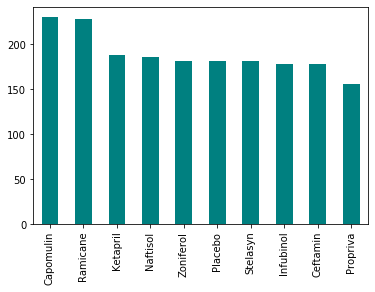

In [280]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_and_drugs = clean_all_data[["Drug Regimen","Timepoint"]]


#find count per drug
mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()
mice_per_drug


#Use DataFrame.plot() in order to create a bar chart of the data
mice_per_drug.plot(kind="bar",color = "teal")


plt.show()

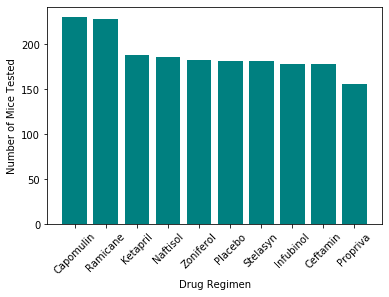

In [281]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values

#graph build and display
plt.bar(drugs, count, color="teal")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=45)
plt.show()

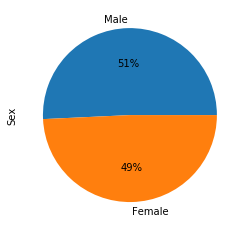

In [282]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_all_data["Sex"].value_counts()
Sex = ["Male", "Female"]
male_vs_female.plot(kind = "pie" , autopct="%1.0f%%")
plt.show()

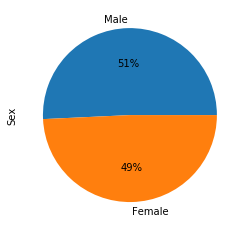

In [283]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
m_f_label = male_vs_female.index.values
count_value = male_vs_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = m_f_label, autopct="%1.0f%%")
plt.show()

In [284]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_data = clean_all_data.loc[(clean_all_data["Drug Regimen"] == "Capomulin") | (clean_all_data["Drug Regimen"] == "Ramicane") |
                                        (clean_all_data["Drug Regimen"] == "Infubinol") |(clean_all_data["Drug Regimen"] == "Ceftamin") ]

# Start by getting the last (greatest) timepoint for each mouse
last_tp = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()
new_last_tp


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,30.276232,0,Male,1,17
96,Ramicane,u196,45,40.667713,3,Male,18,25
97,Ramicane,w678,5,43.166373,0,Female,5,24
98,Ramicane,y449,15,44.183451,0,Male,19,24


In [285]:
reduced_last_tp=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
1,Capomulin,38.939633
2,Capomulin,30.485985
3,Capomulin,37.074024
4,Capomulin,40.159220
...,...,...
95,Ramicane,30.276232
96,Ramicane,40.667713
97,Ramicane,43.166373
98,Ramicane,44.183451


In [286]:
capomulin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
1,Capomulin,38.939633
2,Capomulin,30.485985
3,Capomulin,37.074024
4,Capomulin,40.159220
5,Capomulin,47.685963
6,Capomulin,37.311846
7,Capomulin,38.125164
8,Capomulin,38.753265
9,Capomulin,41.483008


In [287]:
ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

,Drug Regimen,Tumor Volume (mm3)
75,Ramicane,38.407618
76,Ramicane,43.047543
77,Ramicane,38.810366
78,Ramicane,32.978522
79,Ramicane,38.342008
80,Ramicane,33.397653
81,Ramicane,37.311236
82,Ramicane,40.659006
83,Ramicane,29.128472
84,Ramicane,33.562402


In [288]:
infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

,Drug Regimen,Tumor Volume (mm3)
50,Infubinol,67.973419
51,Infubinol,65.525743
52,Infubinol,57.031862
53,Infubinol,66.083066
54,Infubinol,72.226731
55,Infubinol,36.321346
56,Infubinol,60.969711
57,Infubinol,62.435404
58,Infubinol,60.918767
59,Infubinol,67.289621


In [289]:
ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df


,Drug Regimen,Tumor Volume (mm3)
25,Ceftamin,62.999356
26,Ceftamin,45.000000
27,Ceftamin,56.057749
28,Ceftamin,55.742829
29,Ceftamin,48.722078
30,Ceftamin,47.784682
31,Ceftamin,61.849023
32,Ceftamin,68.923185
33,Ceftamin,67.748662
34,Ceftamin,57.918381


In [290]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

new_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [291]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatments:
        treatments.append(drug)
treatments




['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [292]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
upperq_list = []
lowerq_list = []
iqr = upperq-lowerq
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:    
    quartiles = new_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")
upperq_list   
lowerq_list
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Drugs below {lower_bound} could be outliers.")
print(f"Drugs above {upper_bound} could be outliers.")

iqr for Capomulin: 7.781863460000004
iqr for Ceftamin: 15.577752179999997
iqr for Infubinol: 11.477135160000003
iqr for Ramicane: 9.098536719999998
Drugs below 17.912664470000003 could be outliers.
Drugs above 54.30681135 could be outliers.


Text(0.5, 0, '')

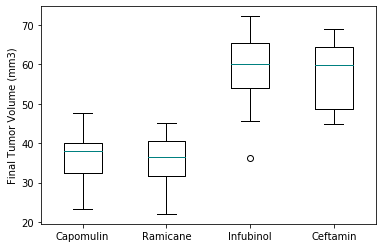

In [293]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='teal'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

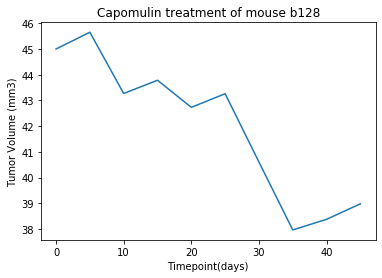

In [294]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_all_data.loc[(clean_all_data["Drug Regimen"] == "Capomulin") & (clean_all_data["Mouse ID"] == "b128") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#plotting values
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [295]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
new_capomulin_df = clean_all_data.loc[(clean_all_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")
#avg tumor volume per weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
avg_capomulin_df

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


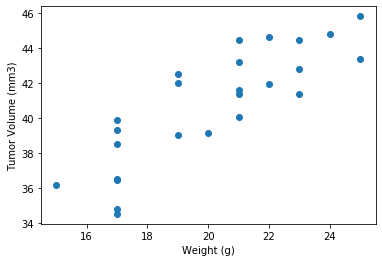

In [296]:
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

In [297]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,avg_tumor_vol)[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


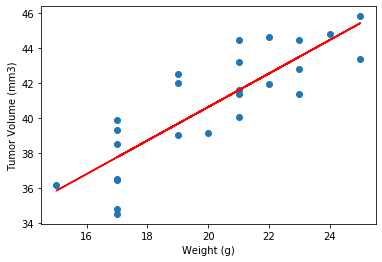

In [298]:
#linear regression model
x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()